<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Model/blob/main/brain_tumorDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/newarchive_3.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [44]:
path = "/content/archive_3"

image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=2,
    vertical_flip=2,
    validation_split=0.4)
dir1='/content/archive_3/train'
training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(256,256),
                                                 subset="training",
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(256,256),
                                                 subset="validation",
                                                 class_mode='binary')

Found 1076 images belonging to 2 classes.
Found 482 images belonging to 2 classes.


In [45]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
H = model.fit(training_set, epochs=40, validation_data=validation_set,verbose=1,shuffle=True)

Epoch 1/40
68/68 [==============================] - 12s 103ms/step - loss: 1.1442 - accuracy: 0.6989 - val_loss: 0.7278 - val_accuracy: 0.4751
Epoch 2/40
68/68 [==============================] - 7s 107ms/step - loss: 0.4654 - accuracy: 0.7946 - val_loss: 1.5583 - val_accuracy: 0.5270
Epoch 3/40
68/68 [==============================] - 6s 95ms/step - loss: 0.4131 - accuracy: 0.8383 - val_loss: 0.5839 - val_accuracy: 0.5394
Epoch 4/40
68/68 [==============================] - 14s 214ms/step - loss: 0.2280 - accuracy: 0.9099 - val_loss: 0.8772 - val_accuracy: 0.5290
Epoch 5/40
68/68 [==============================] - 7s 95ms/step - loss: 0.2619 - accuracy: 0.8866 - val_loss: 0.7323 - val_accuracy: 0.6286
Epoch 6/40
68/68 [==============================] - 8s 116ms/step - loss: 0.2441 - accuracy: 0.9089 - val_loss: 0.6540 - val_accuracy: 0.6432
Epoch 7/40
68/68 [==============================] - 7s 109ms/step - loss: 0.1412 - accuracy: 0.9526 - val_loss: 0.2230 - val_accuracy: 0.9066
Epoch 

In [49]:
hist = H.history

In [50]:
model.evaluate(validation_set )

31/31 [==============================] - 2s 59ms/step - loss: 0.0227 - accuracy: 0.9979


[0.022659702226519585, 0.9979252815246582]

Text(0, 0.5, 'accuracy')

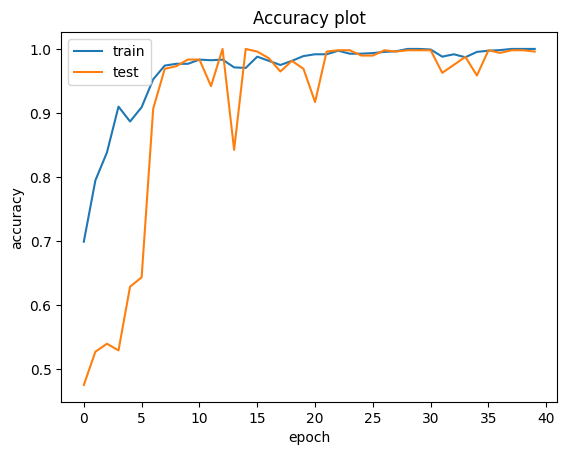

In [51]:
import matplotlib.pyplot as plt
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

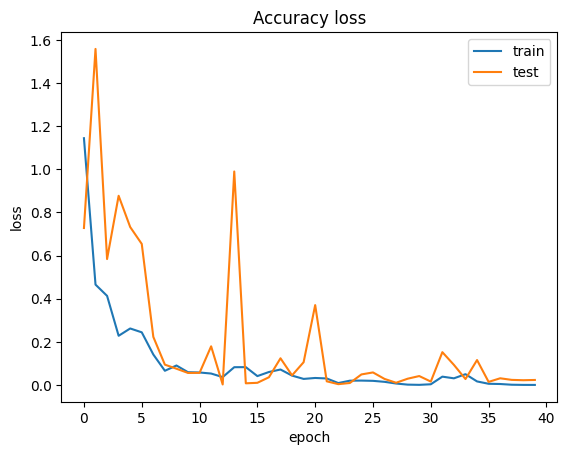

In [52]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [64]:
#test='/content/archive_3/validation2'
test_data = image_generator.flow_from_directory(
    dir2,
    target_size=(256, 256),
    batch_size= 16,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)


Found 482 images belonging to 2 classes.
31/31 [==============================] - 5s 149ms/step


In [65]:
predicted_labels = model.predict(test_data)

31/31 [==============================] - 2s 56ms/step


In [66]:
predicted_label_index = np.argmax(predicted_labels, axis=None)

In [67]:
predicted_labels_rounded = ((np.rint(predicted_labels.ravel())).astype(int))

In [68]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

31/31 [==============================] - 2s 61ms/step - loss: 0.0223 - accuracy: 0.9979
Test Loss: 0.022334560751914978
Test Accuracy: 0.9979252815246582


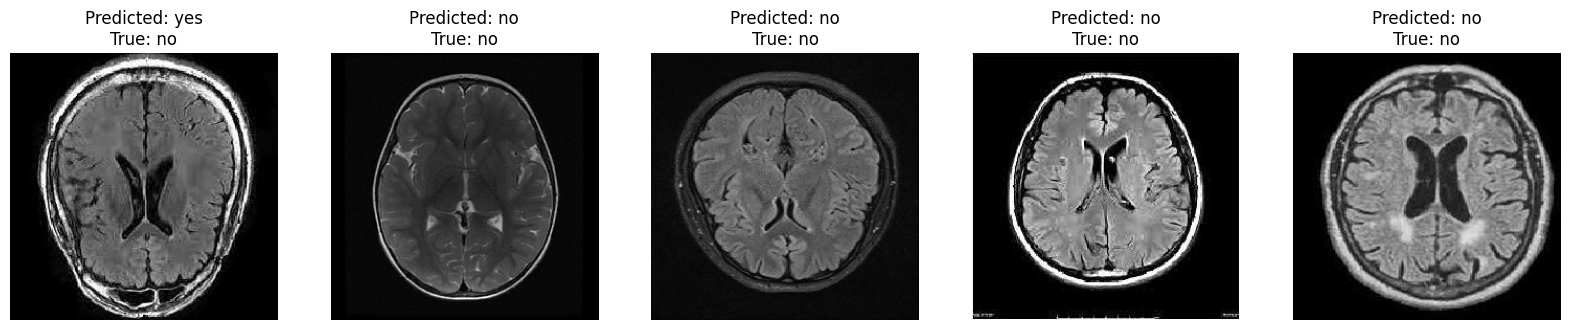

In [69]:
# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]


# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels_rounded]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [70]:
from sklearn.metrics import classification_report

# Ensure the arrays have the same number of samples
num_samples = min(len(true_labels), len(predicted_labels_rounded))
true_labels = true_labels[:num_samples]
predicted_labels_rounded = predicted_labels_rounded[:num_samples]

# Generate the classification report
print(classification_report(true_labels, predicted_labels_rounded))


              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.50      0.57      0.53         7

    accuracy                           0.56        16
   macro avg       0.56      0.56      0.56        16
weighted avg       0.57      0.56      0.56        16



In [71]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels,predicted_labels_rounded)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5 4]
 [3 4]]


In [72]:
model.save("./Modelcnn.h5")